# Comparing similarity judgments among blind individuals to word embeddings

Sean Trott (4/16/2019)

## Load verbs

In [1]:
import pandas as pd

from tqdm import tqdm

In [2]:
df_verbs = pd.read_csv("data/verb_frequencies.csv")

In [3]:
df_verbs.head(5)

,category,subcategory,verb,FREQcount,CDcount,FREQlow,CDlow,SUBTLwf,Lg10WF,SUBTLcd,Lg10CD,Length
0,emission,light,blaze,107,77,88,72,2.10,2.0334,0.92,1.8921,5
1,emission,light,blink,258,214,229,194,5.06,2.4133,2.55,2.3324,5
2,emission,light,flare,215,138,196,132,4.22,2.3345,1.65,2.1430,5
3,emission,light,flash,783,578,609,502,15.35,2.8943,6.89,2.7627,5
4,emission,light,flicker,35,34,32,32,0.69,1.5563,0.41,1.5441,7


## Obtain word embeddings for each word

In [4]:
from allennlp.commands.elmo import ElmoEmbedder

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


In [5]:
elmo = ElmoEmbedder()

In [6]:
embeddings = []
for verb in tqdm(list(df_verbs['verb'])):
    embedding = elmo.embed_sentence([verb])
    decontextualized = embedding[0][0].tolist()
    
    embeddings.append(decontextualized)

100%|██████████| 105/105 [00:19<00:00,  5.93it/s]


In [7]:
df_verbs['embedding'] = embeddings

## Dimensionality reduce

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(embeddings)

In [10]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

In [11]:
# Kind of ugly, fix later
df_verbs['pc1'] = list(principalDf['pc1'])
df_verbs['pc2'] = list(principalDf['pc2'])

In [12]:
df_verbs.head(5)

,category,subcategory,verb,FREQcount,CDcount,FREQlow,CDlow,SUBTLwf,Lg10WF,SUBTLcd,Lg10CD,Length,embedding,pc1,pc2
0,emission,light,blaze,107,77,88,72,2.10,2.0334,0.92,1.8921,5,"[-0.03797150403261185, 0.18279701471328735, -0...",-0.078553,-2.305982
1,emission,light,blink,258,214,229,194,5.06,2.4133,2.55,2.3324,5,"[-0.2869924306869507, -1.3215936422348022, 1.4...",-2.233872,2.961401
2,emission,light,flare,215,138,196,132,4.22,2.3345,1.65,2.1430,5,"[0.12033633142709732, 1.394661545753479, 0.059...",-2.212720,0.466960
3,emission,light,flash,783,578,609,502,15.35,2.8943,6.89,2.7627,5,"[0.2201690673828125, 0.06947101652622223, -0.7...",-3.475421,0.015898
4,emission,light,flicker,35,34,32,32,0.69,1.5563,0.41,1.5441,7,"[-0.33750277757644653, 0.289326548576355, 0.46...",-4.540831,2.250740


## Plot

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook

<IPython.core.display.Javascript object>


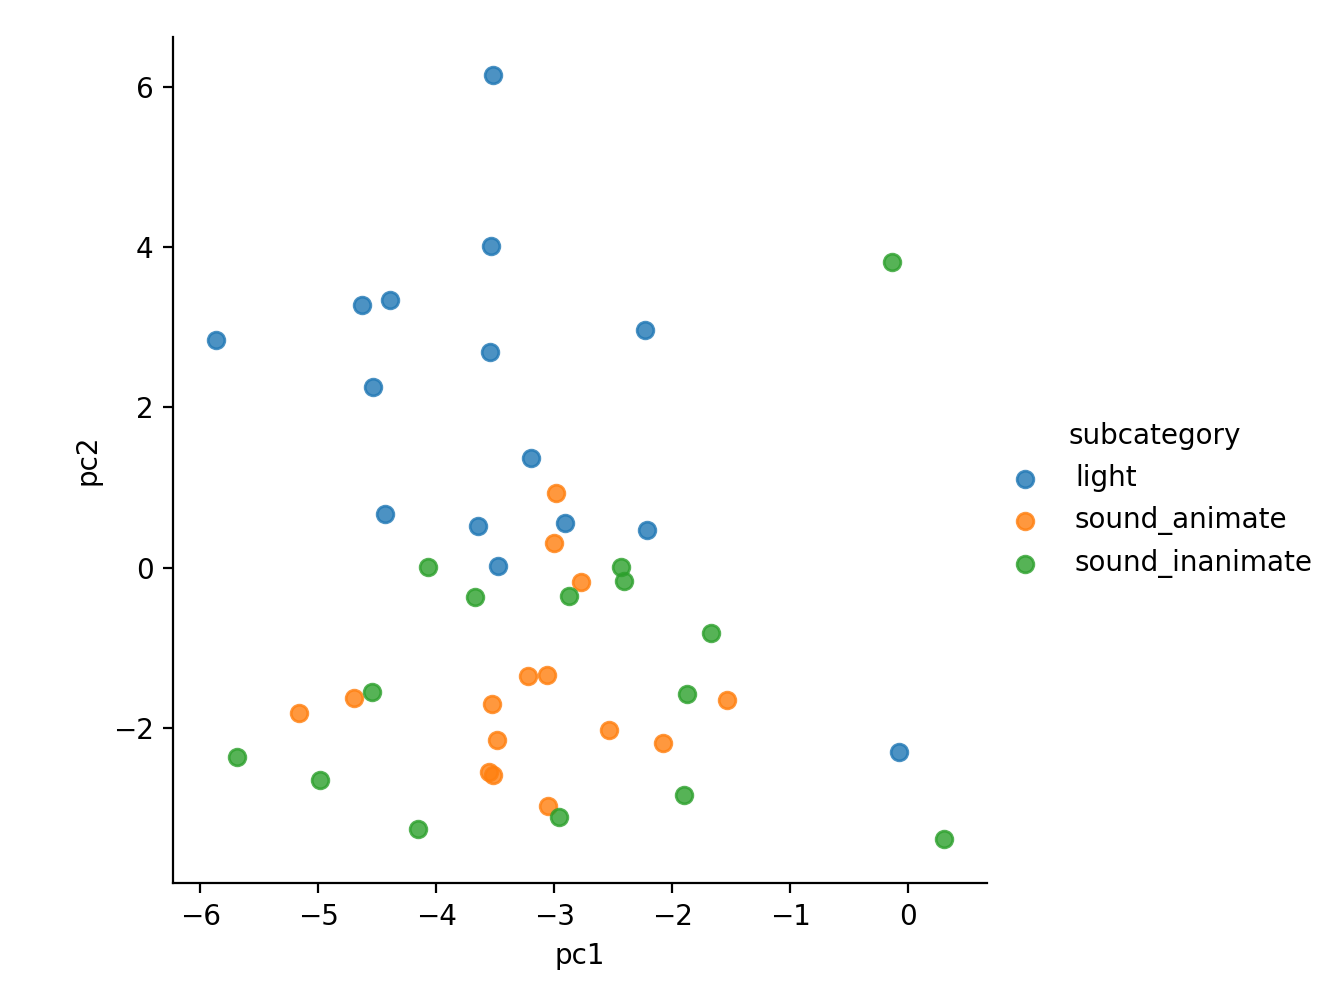

In [23]:
sns.lmplot(x="pc1", y="pc2", data=df_verbs[df_verbs['category']=="emission"], 
           fit_reg=False, hue='subcategory', 
           legend=True)

<IPython.core.display.Javascript object>


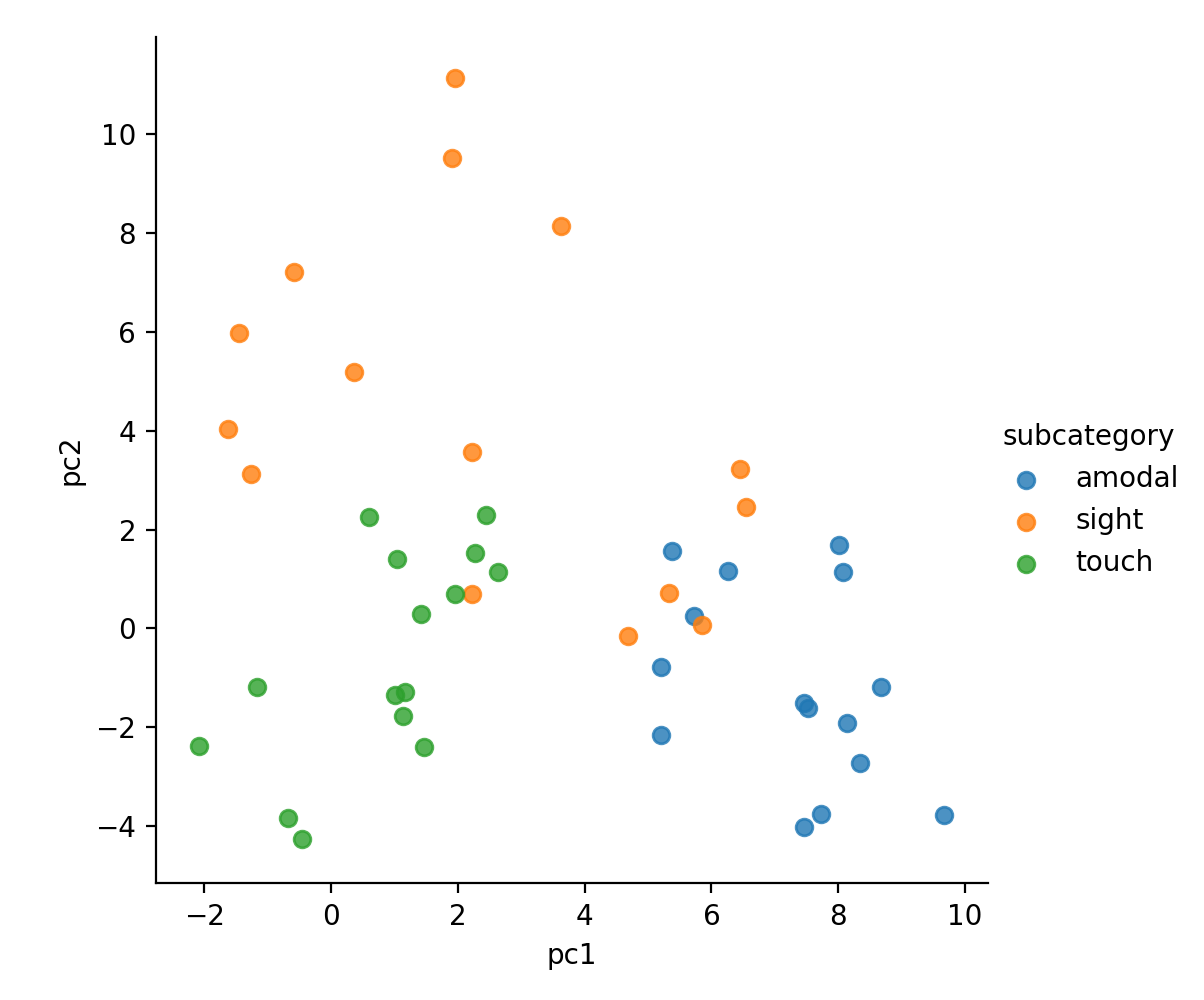

In [24]:
sns.lmplot(x="pc1", y="pc2", data=df_verbs[df_verbs['category']=="perception"], 
           fit_reg=False, hue='subcategory',
           legend=True)

## Hierarchical clustering

### For sight perception

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage  

In [19]:
df_sighted = df_verbs[df_verbs['subcategory']=="sight"]
len(df_sighted)

15

In [20]:
X = df_sighted[['pc1', 'pc2']].values

In [21]:
linked = linkage(X, 'ward')

<IPython.core.display.Javascript object>


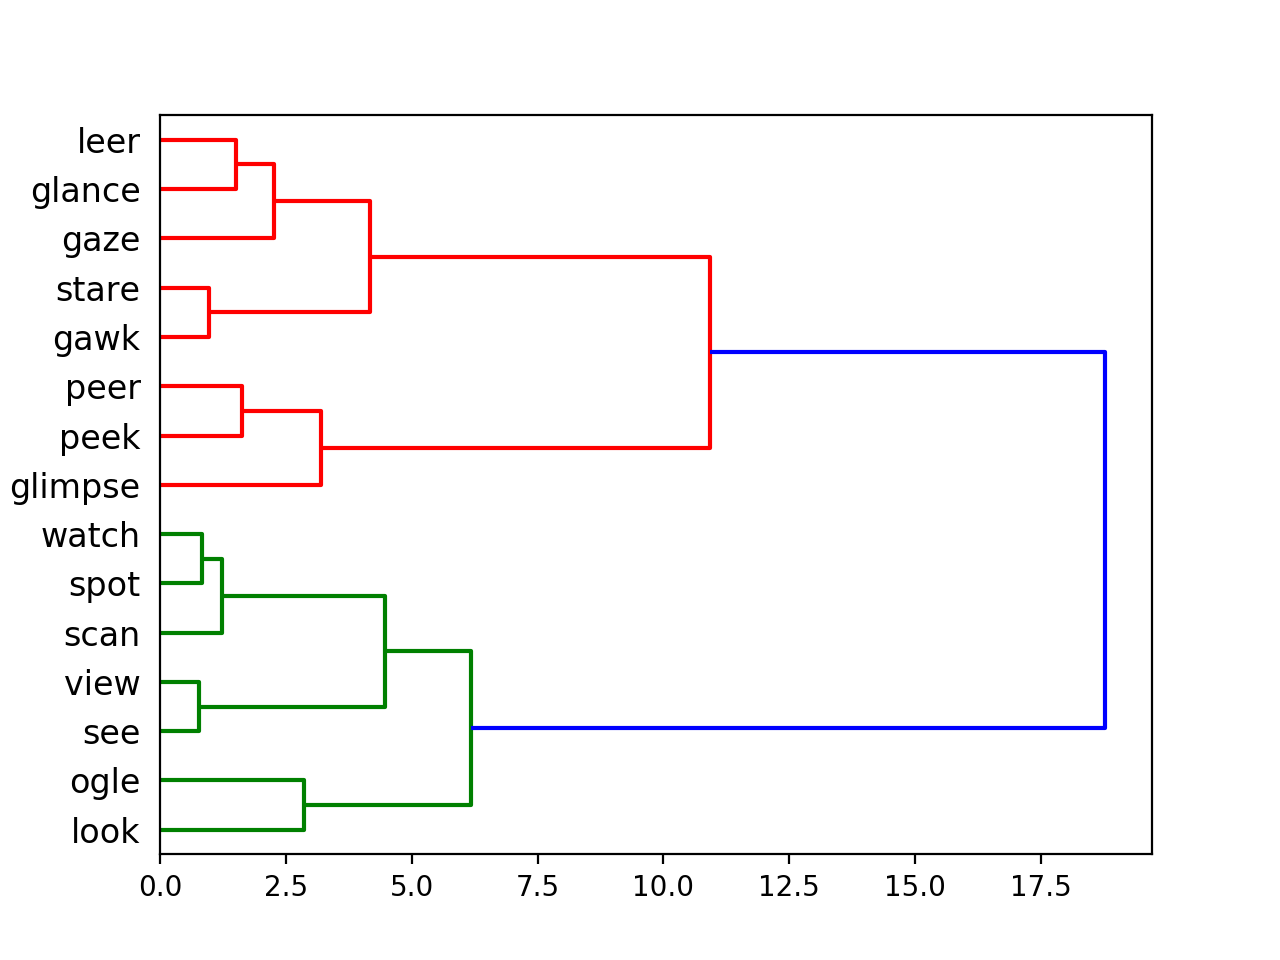

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [30.0, 30.0, 52.5, 52.5],
  [10.0, 10.0, 41.25, 41.25],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [110.0, 110.0, 132.5, 132.5],
  [82.5, 82.5, 121.25, 121.25],
  [25.625, 25.625, 101.875, 101.875]],
 'dcoord': [[0.0, 2.8602040644409774, 2.8602040644409774, 0.0],
  [0.0, 0.771857115890287, 0.771857115890287, 0.0],
  [0.0, 0.827163397675673, 0.827163397675673, 0.0],
  [0.0, 1.2225454916879863, 1.2225454916879863, 0.827163397675673],
  [0.771857115890287,
   4.479186794235799,
   4.479186794235799,
   1.2225454916879863],
  [2.8602040644409774,
   6.179315630609624,
   6.179315630609624,
   4.479186794235799],
  [0.0, 1.6315231639001115, 1.6315231639001115, 0.0],
  [0.0, 3.2001809344441536, 3.2001809344441536, 1.6315231639001115],
  [0.0, 0.9744325725410878, 

In [25]:
dendrogram(linked,  
            orientation='right',
           labels=list(df_sighted['verb']),
            distance_sort='descending',
            show_leaf_counts=True)

### For light emission

In [27]:
df_light = df_verbs[df_verbs['subcategory']=="light"]
len(df_sighted)

15

In [28]:
X = df_light[['pc1', 'pc2']].values

In [29]:
linked = linkage(X, 'ward')

<IPython.core.display.Javascript object>


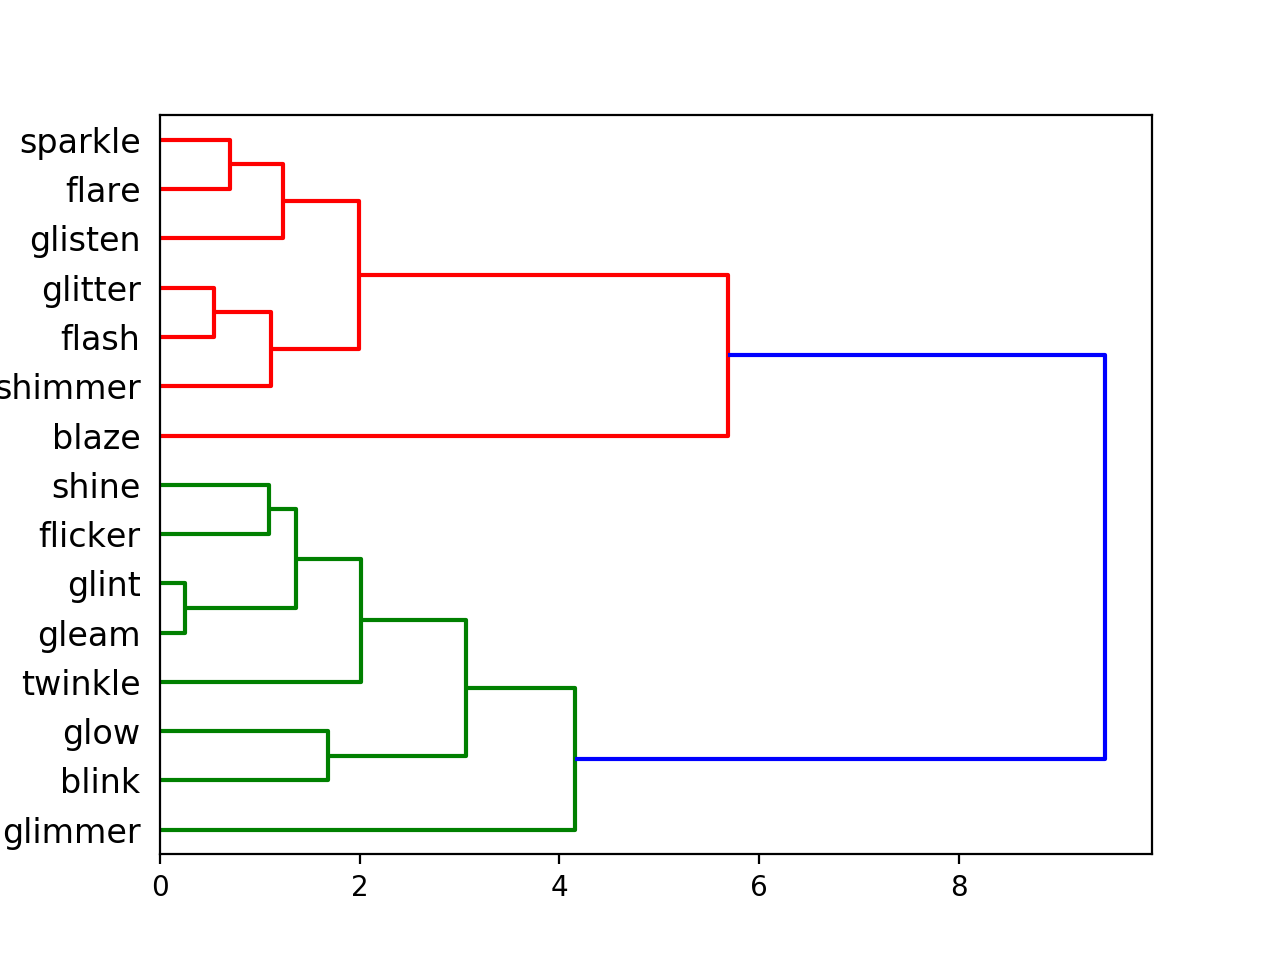

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [35.0, 35.0, 60.0, 60.0],
  [20.0, 20.0, 47.5, 47.5],
  [5.0, 5.0, 33.75, 33.75],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [102.5, 102.5, 132.5, 132.5],
  [85.0, 85.0, 117.5, 117.5],
  [19.375, 19.375, 101.25, 101.25]],
 'dcoord': [[0.0, 1.6789197093349928, 1.6789197093349928, 0.0],
  [0.0, 0.24905672657259295, 0.24905672657259295, 0.0],
  [0.0, 1.0892296124663445, 1.0892296124663445, 0.0],
  [0.24905672657259295,
   1.358422194394211,
   1.358422194394211,
   1.0892296124663445],
  [0.0, 2.016822343489903, 2.016822343489903, 1.358422194394211],
  [1.6789197093349928,
   3.0668225125697934,
   3.0668225125697934,
   2.016822343489903],
  [0.0, 4.157063072748401, 4.157063072748401, 3.0668225125697934],
  [0.0, 0.5368599722495642, 0.5368599722495642, 0.0],
  [0.0, 1.10821668086351

In [30]:
dendrogram(linked,  
            orientation='right',
           labels=list(df_light['verb']),
            distance_sort='descending',
            show_leaf_counts=True)

### For touch

In [31]:
df_verbs['subcategory']

0              light
1              light
2              light
3              light
4              light
5              light
6              light
7              light
8              light
9              light
10             light
11             light
12             light
13             light
14             light
15     sound_animate
16     sound_animate
17     sound_animate
18     sound_animate
19     sound_animate
20     sound_animate
21     sound_animate
22     sound_animate
23     sound_animate
24     sound_animate
25     sound_animate
26     sound_animate
27     sound_animate
28     sound_animate
29     sound_animate
           ...      
75             sight
76             sight
77             sight
78             sight
79             sight
80             sight
81             sight
82             sight
83             sight
84             sight
85             sight
86             sight
87             sight
88             sight
89             sight
90             touch
91           

In [32]:
df_touch = df_verbs[df_verbs['subcategory']=="touch"]
len(df_sighted)

15

In [33]:
X = df_touch[['pc1', 'pc2']].values

In [34]:
linked = linkage(X, 'ward')

<IPython.core.display.Javascript object>


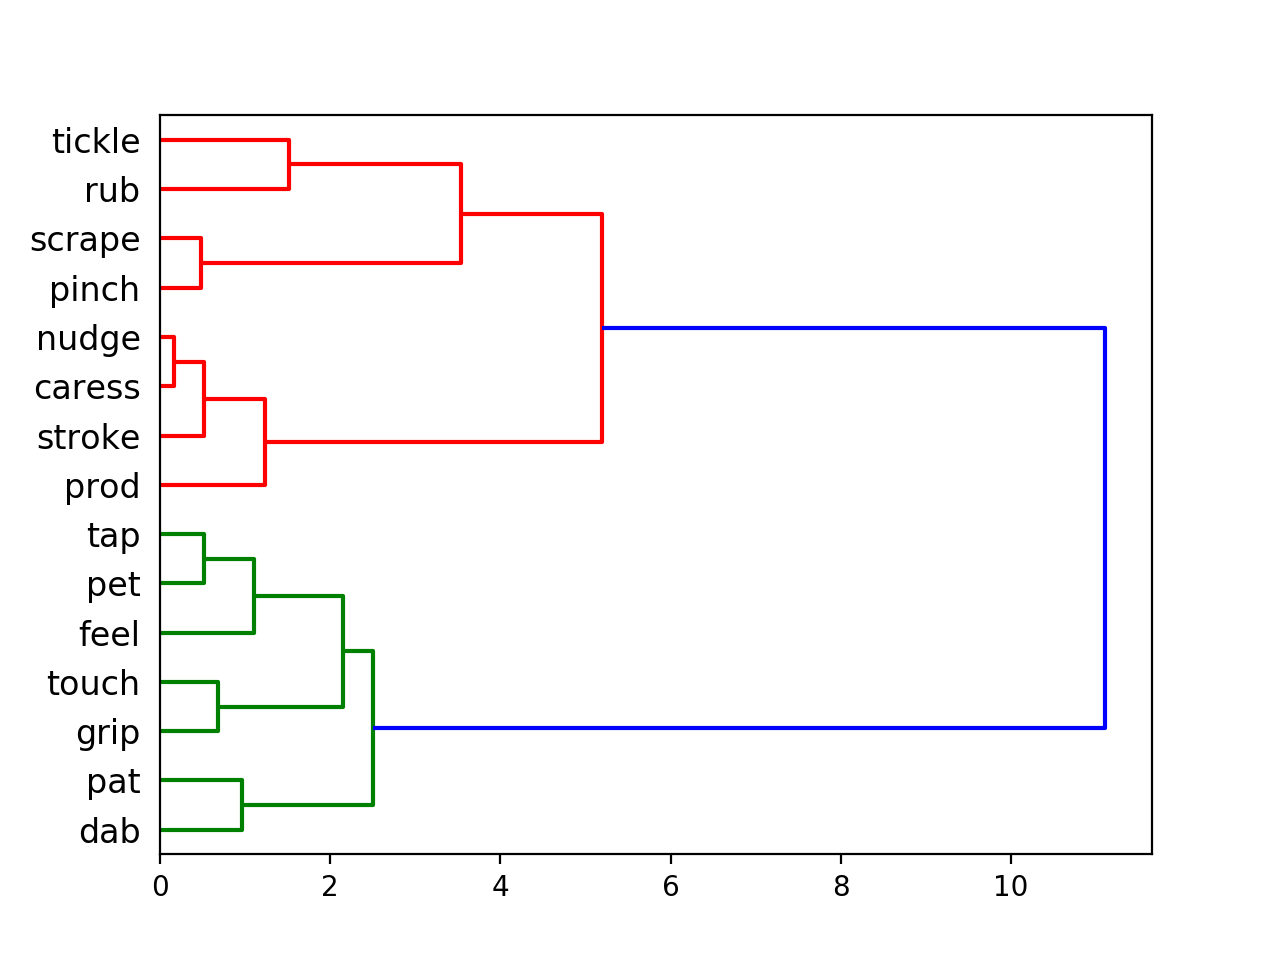

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [30.0, 30.0, 52.5, 52.5],
  [10.0, 10.0, 41.25, 41.25],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [83.75, 83.75, 130.0, 130.0],
  [25.625, 25.625, 106.875, 106.875]],
 'dcoord': [[0.0, 0.9601190284498358, 0.9601190284498358, 0.0],
  [0.0, 0.6832260900991931, 0.6832260900991931, 0.0],
  [0.0, 0.5203827549506366, 0.5203827549506366, 0.0],
  [0.0, 1.1019964948719494, 1.1019964948719494, 0.5203827549506366],
  [0.6832260900991931,
   2.1499078974643333,
   2.1499078974643333,
   1.1019964948719494],
  [0.9601190284498358,
   2.4974461956720835,
   2.4974461956720835,
   2.1499078974643333],
  [0.0, 0.169780567967057, 0.169780567967057, 0.0],
  [0.0, 0.512389409136264, 0.512389409136264, 0.169780567967057],
  [0.0, 1.237304744230

In [35]:
dendrogram(linked,  
            orientation='right',
           labels=list(df_touch['verb']),
            distance_sort='descending',
            show_leaf_counts=True)

### save to file

In [36]:
df_verbs.to_csv("data/processed/verbs_with_embeddings.csv")